<img src="http://sonetodigital.com.br/adm/wp-content/uploads/2018/12/logo-fiap.png" width="150" align="left"/>

<br/><br/>

<font size=5 color="#ed145b"><b> Sistemas para internet </b></font><font size=5 color="#ed145b"> - Inteligência Artificial e Machine Learning </font>

<font size=4 color="#ed145b">NAC Supervised Learning</font>

<font size=5 ><b>Grupo:</b></font>


<b>Abraão Azevedo Oliveira Silva - RM:83983</b> <br/>
<b>Rodrigo Sussumu Tanaka - RM:83888</b> <br/>
<b>Geovanne Amorim Coelho - Rm82578</b> <br/>
<b>Iago Monteiro Garcia - RM82448</b> <br/><br/><br/>


<font size=6 ><b>Classificar a performance de alunos </b></font>
<br/><br/>
<article>
    <p> 
        <a href="https://archive.ics.uci.edu/ml/datasets/Student+Performance">Link para onde pegamos o data set</a>
    </p>
</article>

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv("./data/2019.csv")
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [26]:
data.sort_values(by="Perceptions of corruption", ascending=True)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004
47,48,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
...,...,...,...,...,...,...,...,...,...
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411


In [28]:
data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


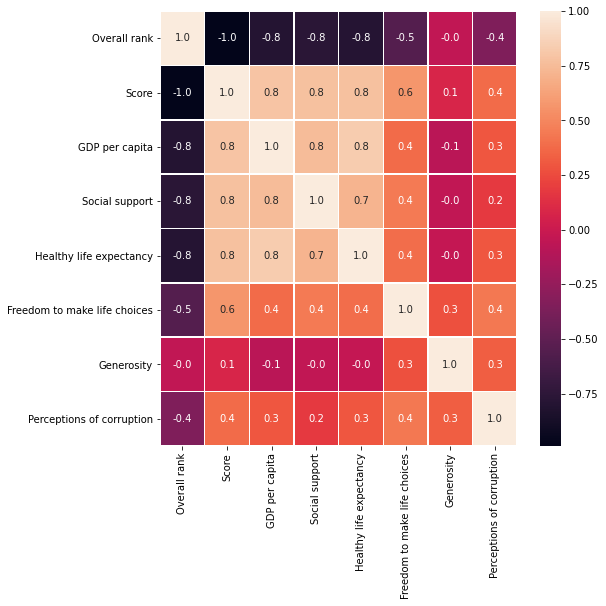

In [33]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

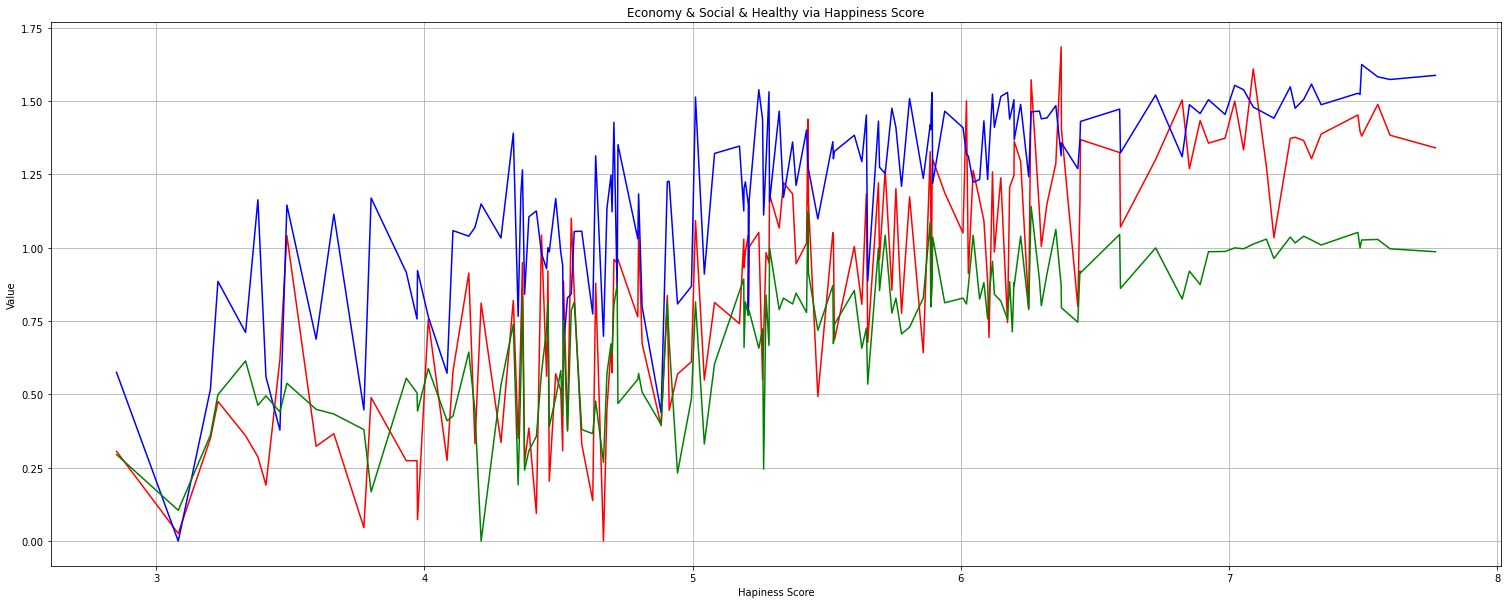

In [62]:
plt.plot(data["Score"], data["GDP per capita"], color="red")
plt.plot(data["Score"], data["Social support"], color="blue")
plt.plot(data["Score"], data["Healthy life expectancy"], color="green")
plt.grid()
plt.xlabel("Hapiness Score")
plt.ylabel("Value")
plt.title("Economy & Social & Healthy via Happiness Score")
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

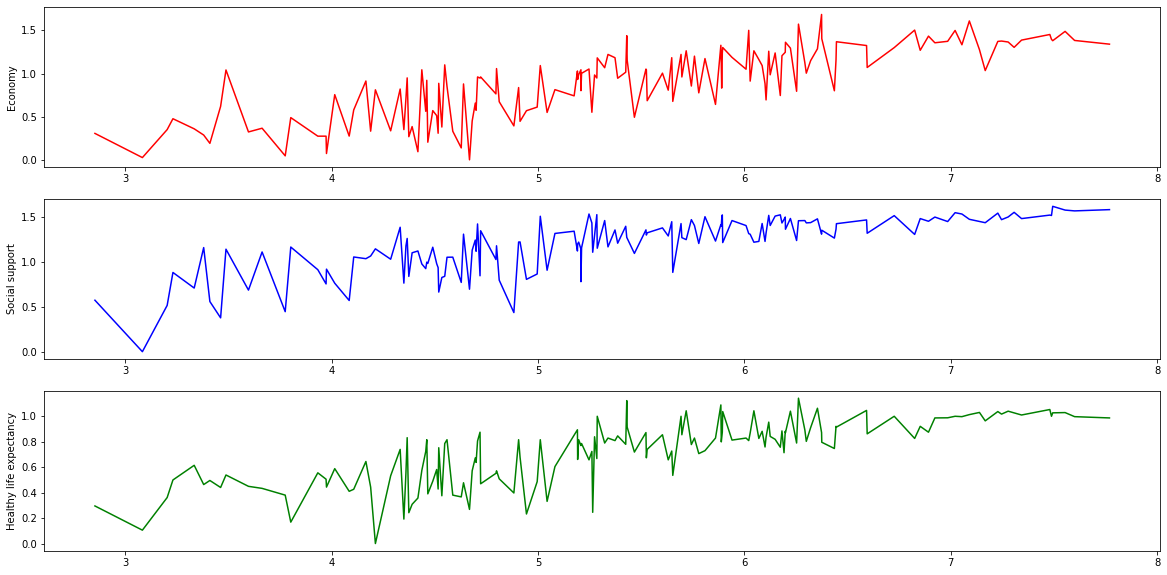

In [66]:
plt.subplot(3,1,1)
plt.plot(data["Score"], data["GDP per capita"], color="red")
plt.ylabel("Economy")

plt.subplot(3,1,2)
plt.plot(data["Score"], data["Social support"], color="blue")
plt.ylabel("Social support")

plt.subplot(3,1,3)
plt.plot(data["Score"], data["Healthy life expectancy"], color="green")
plt.ylabel("Healthy life expectancy")

plt.show()

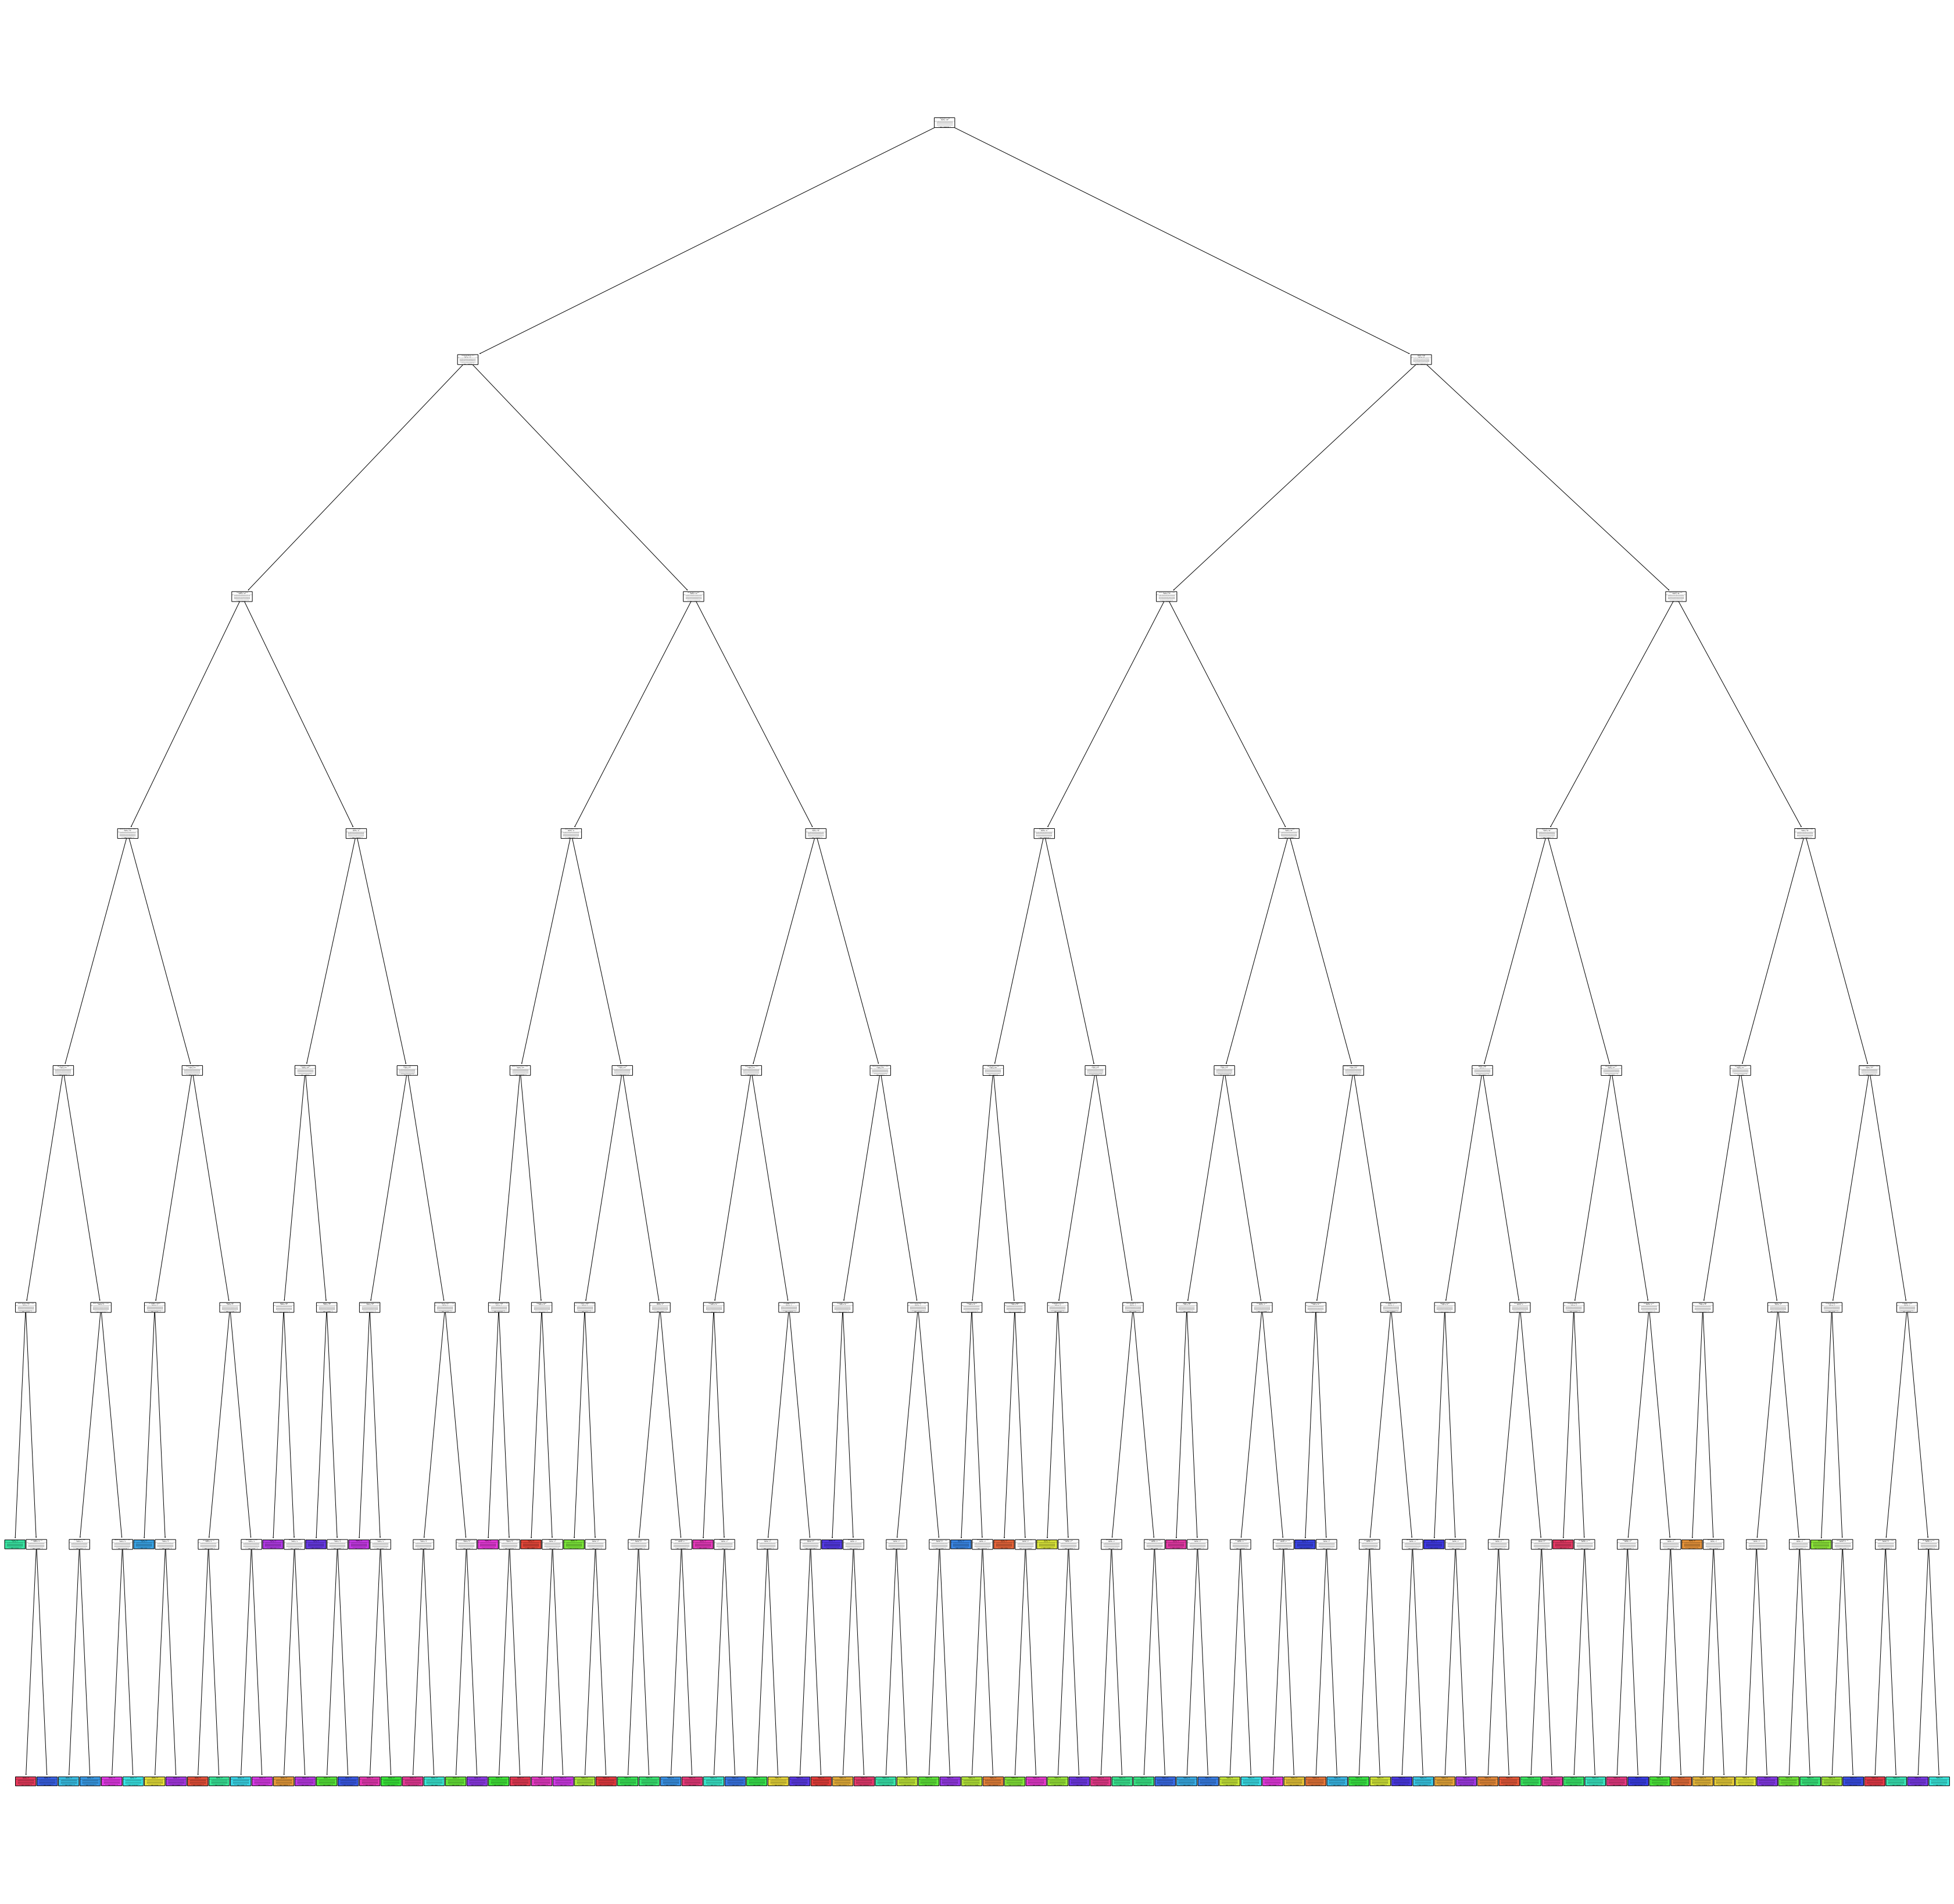

In [10]:
# Dividindo x e y
x = data.drop(columns=["Country or region"]).values 

y = data['Country or region']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(60, 60))
_ = plot_tree(model, 
              feature_names=data.columns[:-1],  
              class_names=model.classes_, 
              filled=True, rounded = True, ax=ax)

In [3]:
maxGrade = 20;
isApproved = data.G3 >= maxGrade / 2;
data["Situation"] = isApproved

In [4]:
data = data.apply(preprocessing.LabelEncoder().fit_transform)

In [5]:
data.Situation = data.Situation.map({True: "Approved", False: "Reproved"})

In [6]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Situation
0,0,0,3,1,0,0,4,4,0,4,...,2,3,0,0,2,4,0,7,8,Approved
1,0,0,2,1,0,1,1,1,0,2,...,2,2,0,0,2,2,6,7,8,Approved
2,0,0,0,1,1,1,1,1,0,2,...,2,1,1,2,2,6,9,9,9,Approved
3,0,0,0,1,0,1,4,2,1,3,...,1,1,0,0,4,0,11,10,11,Approved
4,0,0,1,1,0,1,3,3,2,2,...,2,1,0,1,4,0,8,9,10,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,4,0,0,1,2,3,3,2,...,3,1,0,1,4,4,7,7,7,Approved
645,1,0,3,1,1,1,3,1,4,3,...,2,3,0,0,0,4,12,11,13,Approved
646,1,0,3,1,0,1,1,1,2,2,...,0,0,0,0,4,6,8,8,6,Reproved
647,1,1,2,1,1,1,3,1,3,3,...,3,4,2,3,1,6,7,6,7,Approved


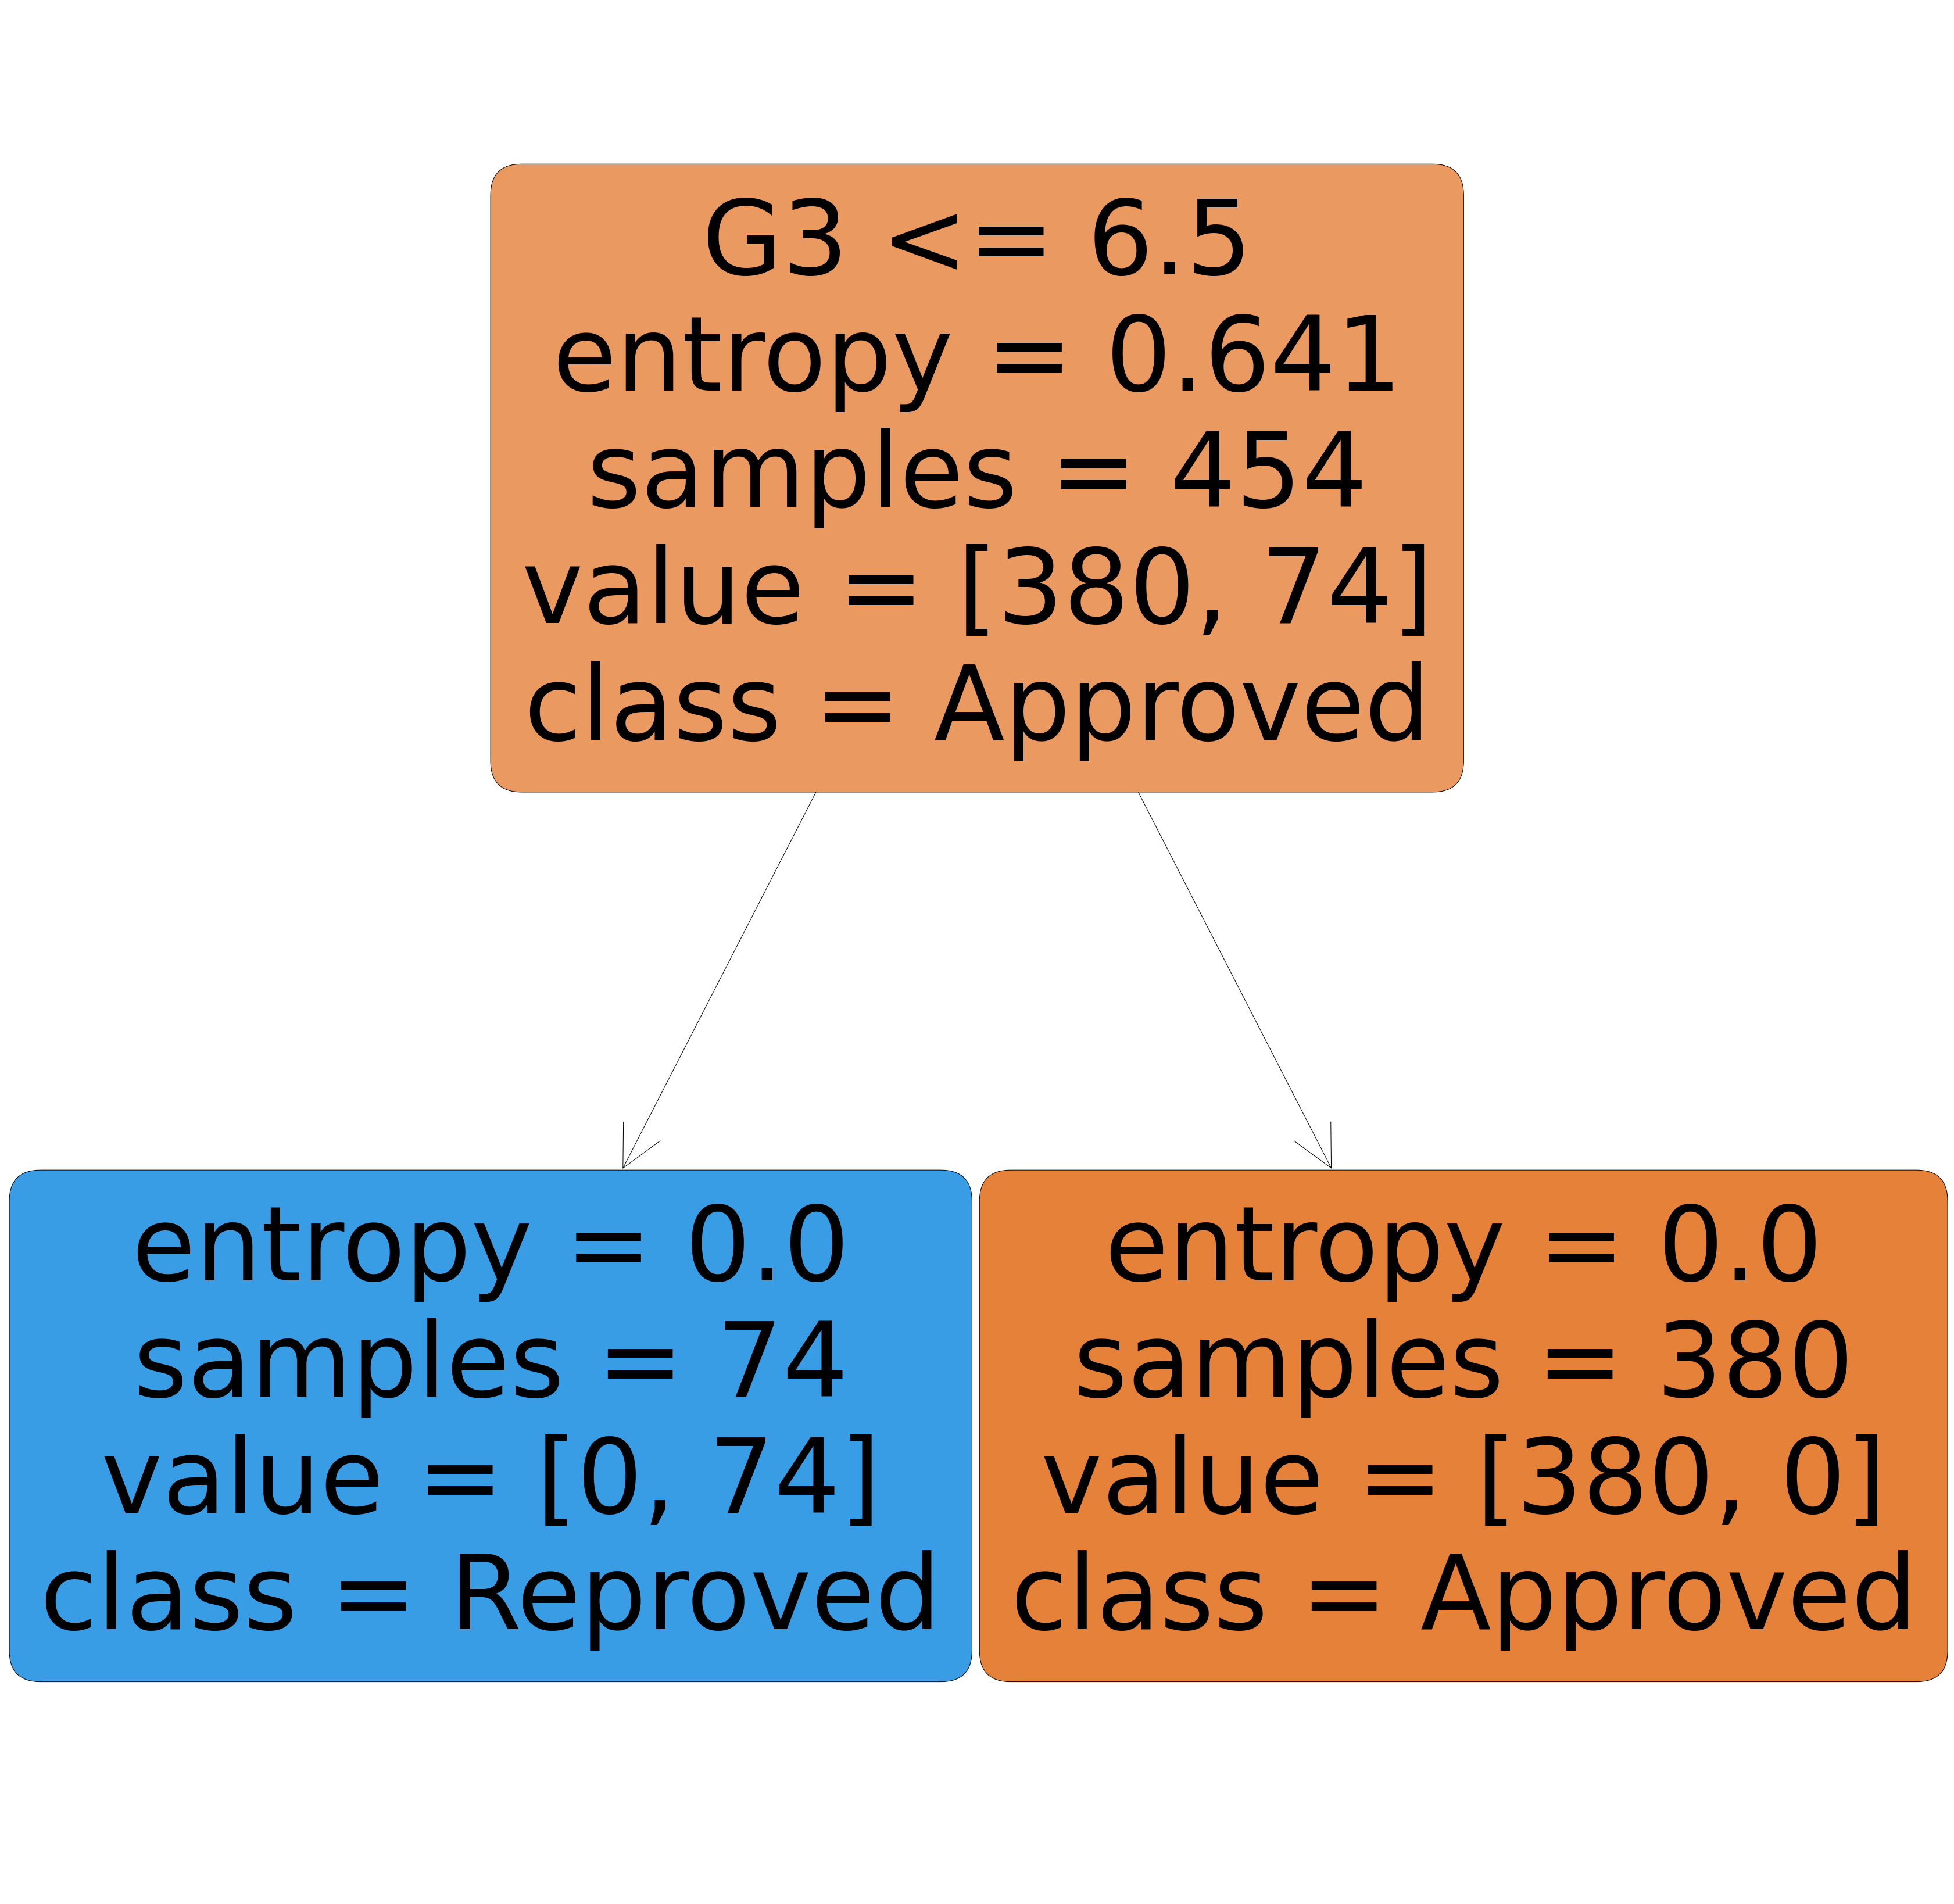

In [7]:
# Dividindo x e y
x = data.drop(columns=["Situation"]).values 

y = data['Situation']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(60, 60))
_ = plot_tree(model, 
              feature_names=data.columns[:-1],  
              class_names=model.classes_, 
              filled=True, rounded = True, ax=ax)

In [8]:
data_x = data.drop(columns='Situation')

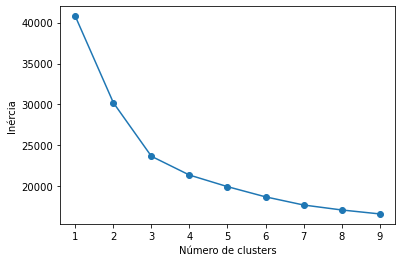

In [9]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))
# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_x)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [10]:
data_x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,4,0,7,8
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,2,6,7,8
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,6,9,9,9
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,0,11,10,11
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,0,8,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,4,0,0,1,2,3,3,2,...,4,3,1,0,1,4,4,7,7,7
645,1,0,3,1,1,1,3,1,4,3,...,3,2,3,0,0,0,4,12,11,13
646,1,0,3,1,0,1,1,1,2,2,...,0,0,0,0,0,4,6,8,8,6
647,1,1,2,1,1,1,3,1,3,3,...,1,3,4,2,3,1,6,7,6,7


In [11]:
data_select = data[['G1','G2']]
data_select.head()

,G1,G2
0,0,7
1,6,7
2,9,9
3,11,10
4,8,9


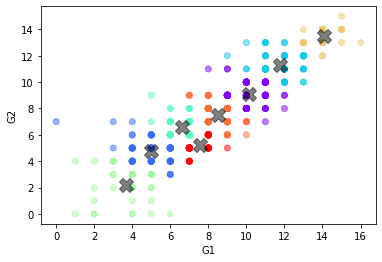

In [12]:
kmeans = KMeans(random_state=0).fit(data_select)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(data_select)


plt.scatter(data_select.G1, data_select.G2, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('G1')
plt.ylabel('G2')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

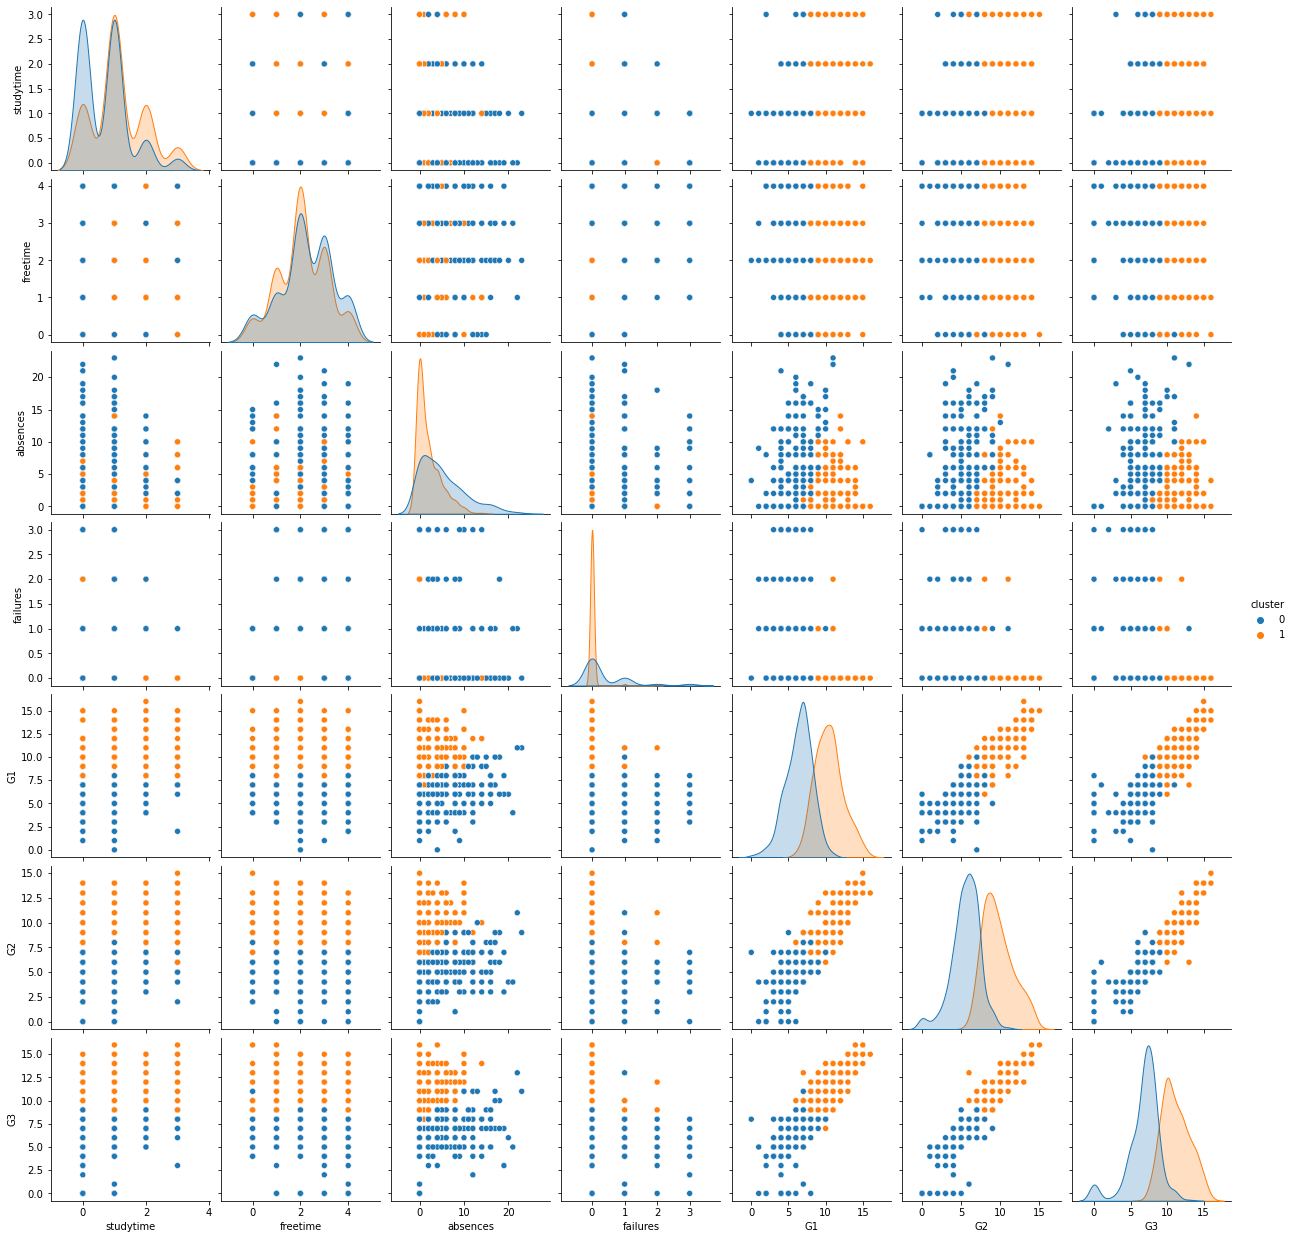

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data_x)
data_clustered = data_x.copy()
data_clustered['cluster'] = clusters
sns.pairplot(data_clustered[['studytime','freetime','absences','failures','G1','G2','G3','cluster']], 
             hue='cluster');

In [14]:
silhouette_score(data_x, clusters)

0.22129679387839898

In [15]:
silhouette_values = silhouette_samples(data_x, clusters)
len(silhouette_values)

649

In [16]:
def plot_silhouette(clusters, k, sample_silhouette_values):
    
    fig, ax1 = plt.subplots()
    fig.set_size_inches(5, 5)

    ax1.set_xlim([-1, 1])
    #ax1.xaxis.label.set_size(40)
    
    y_upper = 0
    y_lower = 0
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Set2(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.8)

        y_lower = y_upper + 10  
        
    ax1.set_ylim(bottom=0, top=y_upper+20)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.set_xticks(np.arange(-1,2,0.5))
    ax1.set_yticks(np.arange(0,y_upper+1,y_upper/5))
    ax1.tick_params(color='gray',labelcolor='gray', labelright=False, labelleft=False, grid_alpha=0.5)
    ax1.spines['top'].set_visible(False);ax1.spines['right'].set_visible(False);ax1.spines['left'].set_visible(False)
    return plt

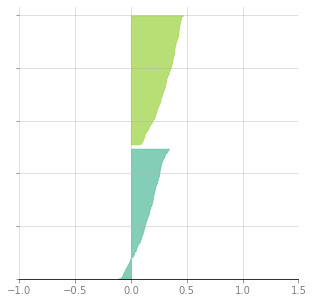

In [17]:
plot_silhouette(clusters, 2, silhouette_values);

In [18]:
adjusted_rand_score(data['G3'], clusters)

0.1383070508280171

In [19]:
data = data[['studytime','freetime','absences','failures','G1','G2','G3','Situation']]

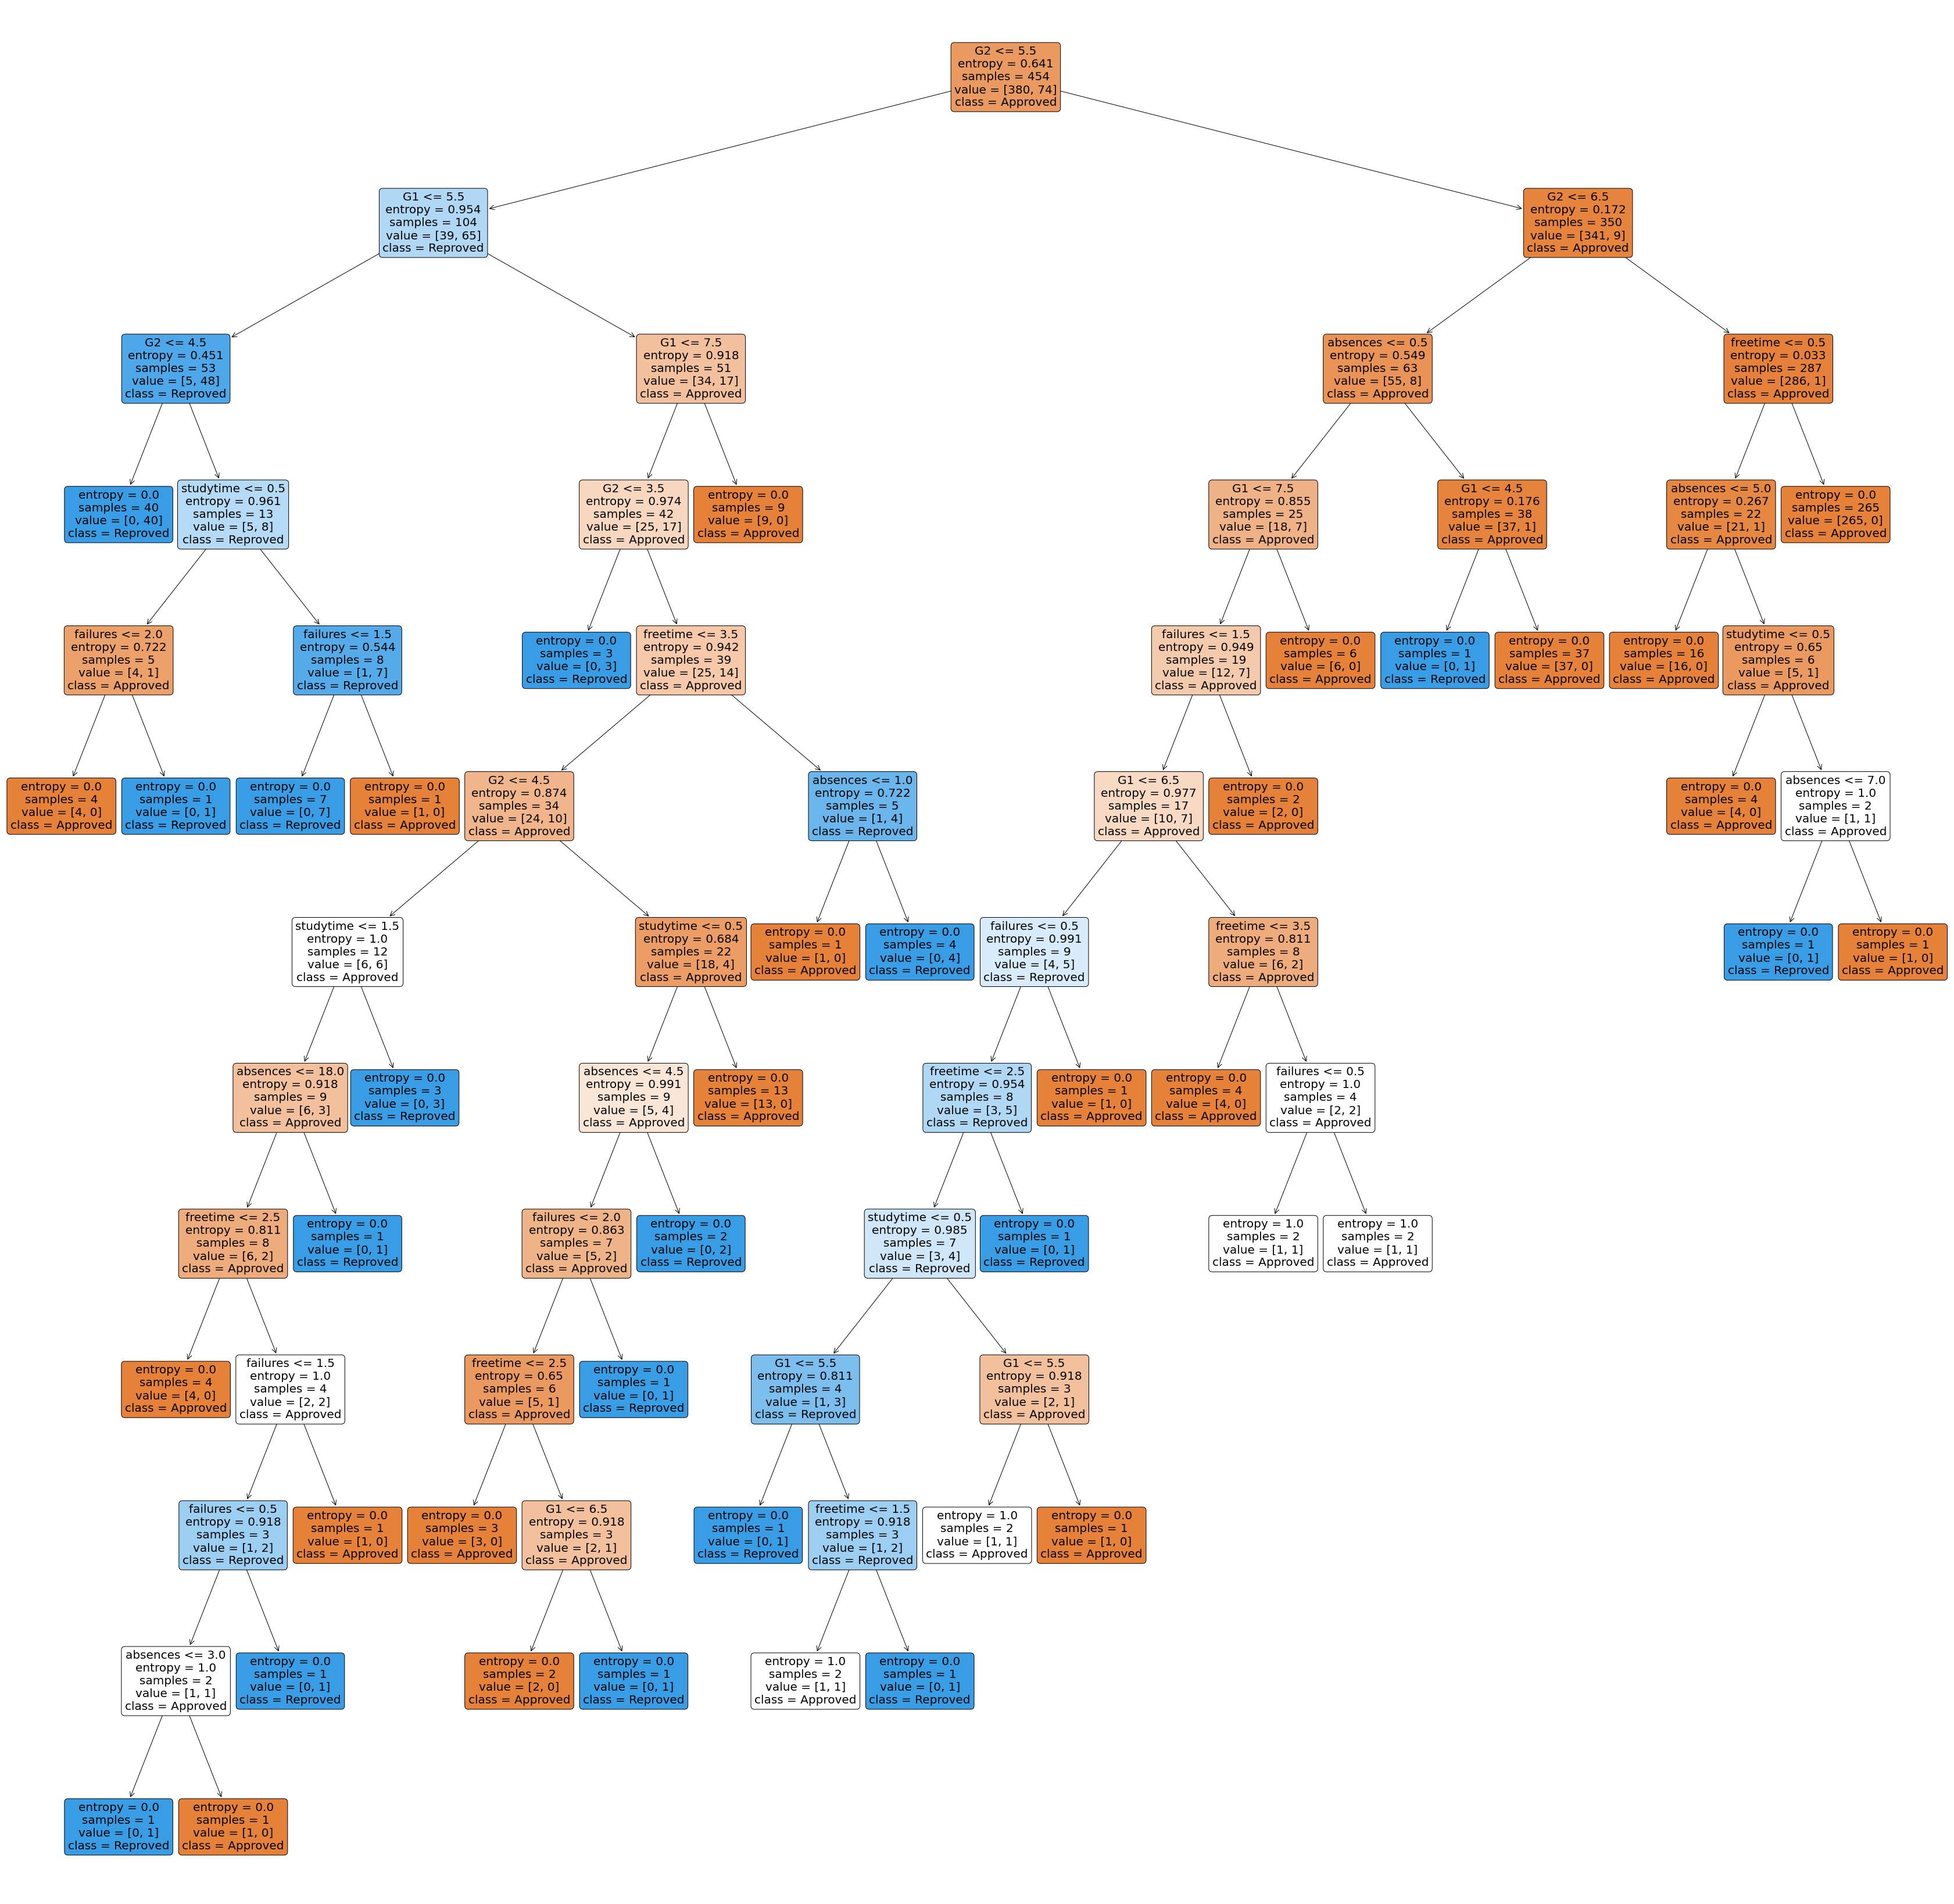

In [20]:
# Dividindo x e y
x = data.drop(columns=["Situation",'G3']).values  
y = data['Situation']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(60, 60))
_ = plot_tree(model, 
              feature_names=data.columns[:-1],  
              class_names=model.classes_, 
              filled=True, rounded = True, ax=ax)

In [21]:
data_x = data.drop(columns='Situation')

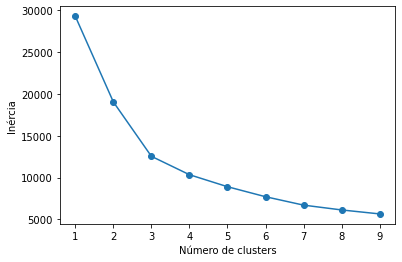

In [22]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))
# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_x)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

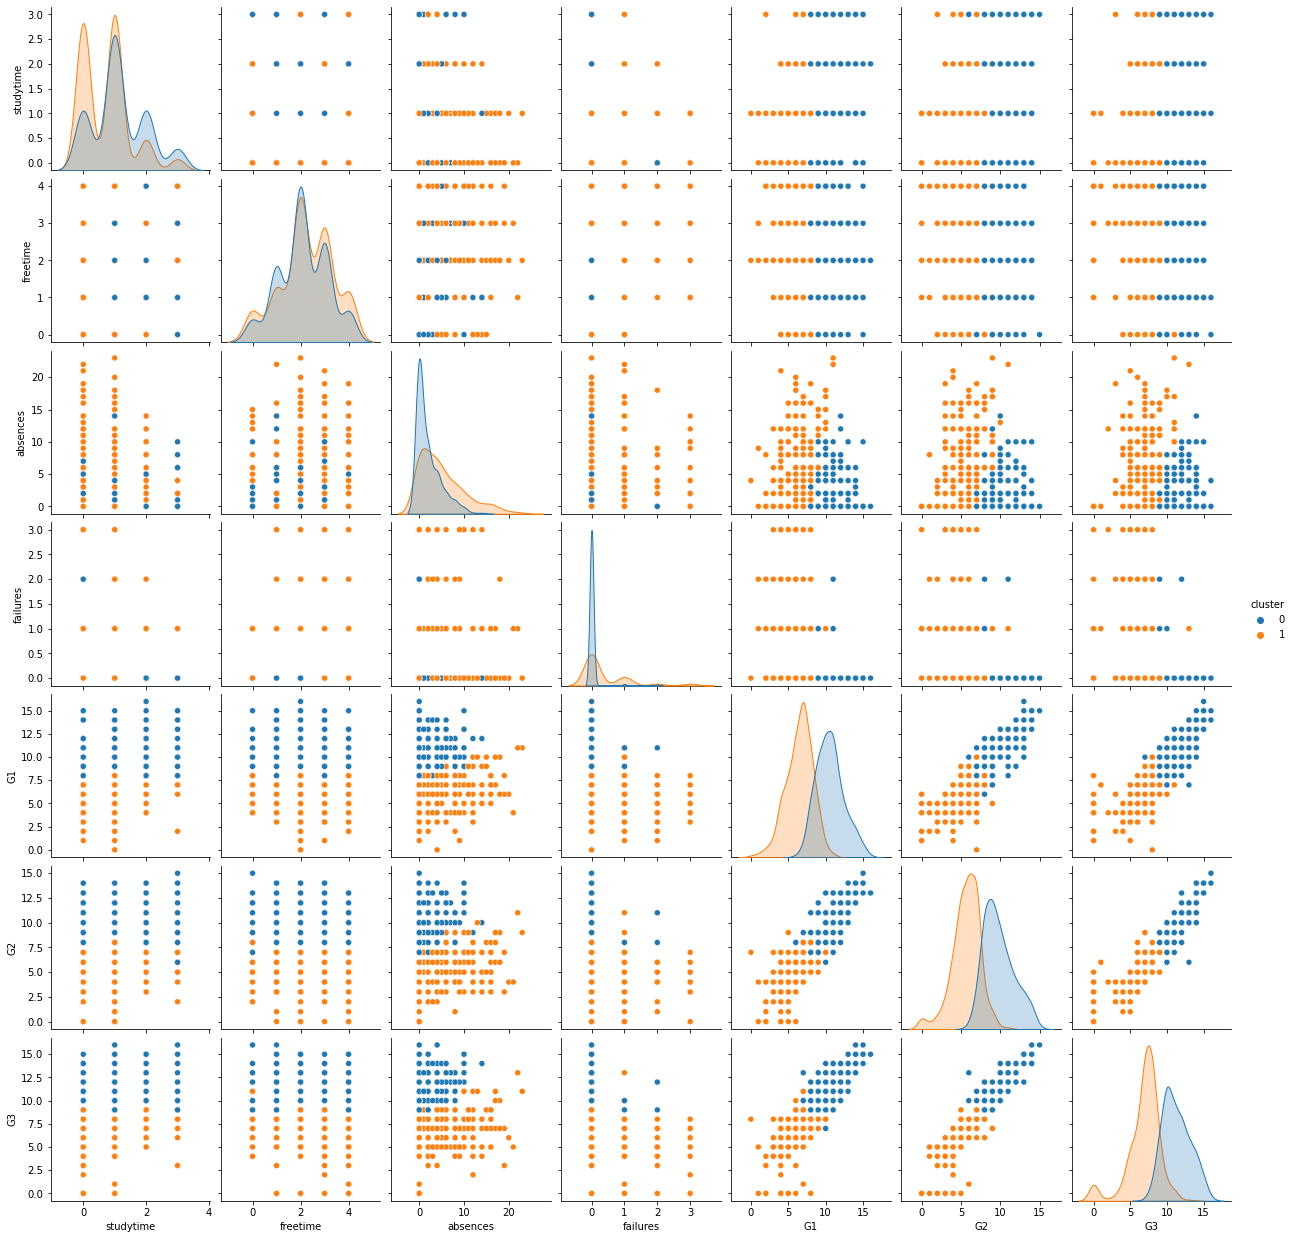

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data_x)
data_clustered = data_x.copy()
data_clustered['cluster'] = clusters
sns.pairplot(data_clustered, 
             hue='cluster');

In [24]:
silhouette_score(data_x, clusters)

0.3141562777294426

In [25]:
silhouette_values = silhouette_samples(data_x, clusters)
len(silhouette_values)

649

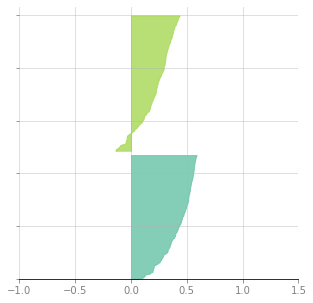

In [26]:
plot_silhouette(clusters, 2, silhouette_values);

In [27]:
adjusted_rand_score(data['G3'], clusters)

0.13895905468599606

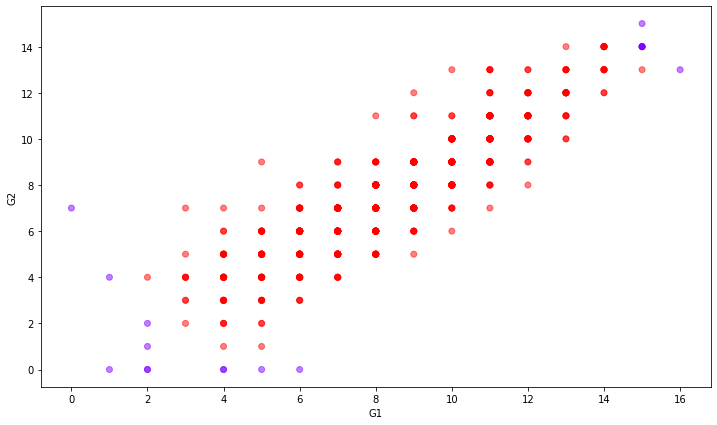

In [28]:
from sklearn.cluster import DBSCAN
clusters_dbscan = DBSCAN(eps=2, min_samples=50).fit_predict(data_select)
plt.rcParams['figure.figsize'] = (12, 7)
plt.scatter(data_select.G1, data_select.G2, c=clusters_dbscan, alpha=0.5, 
            cmap='rainbow')
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

In [29]:
silhouette_score(data_x, clusters_dbscan)

0.3693623087491559

In [30]:
adjusted_rand_score(data_x['G3'], clusters_dbscan)

0.009775103859467045